# LSCI220 Assignment 1: DreamWorks Animation Corpus Analysis

Noppachon Chaisongkhram | 300607581


## 1. Introduction
This corpus consists of ten transcripts from DreamWorks animated feature films released between 2001 and 2011. The selected films represent a significant period in computer-animated filmmaking, capturing the studio's evolution during its years. The corpus includes:
1. Shrek (2001)
2. Madagascar (2005)
3. Bee Movie (2007)
4. Kung Fu Panda (2008)
5. Madagascar 2 (2008)
6. Monsters vs Aliens (2009)
7. How to Train Your Dragon (2010)
8. Megamind (2010)
9. Kung Fu Panda 2 (2011)
10. Puss in Boots (2011)

**Collection Method:** Transcripts were sourced from publicly available fan transcriptions on film script websites. Each text file contains the complete dialogue and scene descriptions as transcribed by fans. The texts represent the raw, unedited transcriptions as found online.

**Corpus Justification:** These films were selected because they represent DreamWorks' mainstream animated output during a period of significant growth in computer animation. The time span (2001-2011) allows for examination of linguistic consistency or evolution across a decade of production. All films target similar family audiences and share comparable narrative structures, making them suitable for comparative linguistic analysis.

## 2. Corpus Loading and Basic Setup

In [102]:
import matplotlib.pyplot as plt
import nltk
import os
import pandas as pd
from nltk.corpus import PlaintextCorpusReader, stopwords
from nltk import FreqDist, Text
from collections import defaultdict

# Download required NLTK resources
nltk.download(['punkt_tab', 'stopwords'])
print("NLTK resources downloaded successfully")

NLTK resources downloaded successfully


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
# Path to transcripts
corpus_root = './transcripts'

if not os.path.exists(corpus_root):
    print(f"Error: Directory '{corpus_root}' not found.")
else:
    # Load text files
    movie_corpus = PlaintextCorpusReader(corpus_root, r'.*\.txt')  # Raw string

    # Display corpus information
    print("=" * 60)
    print("CORPUS LOADING COMPLETE")
    print("=" * 60)
    print(f"Number of texts loaded: {len(movie_corpus.fileids())}")
    print(f"Total words (tokens) in corpus: {len(movie_corpus.words()):,}")
    print(f"Unique words (types) in corpus: {len(set(movie_corpus.words())):,}")
    print(f"Overall Type-Token Ratio: {len(set(movie_corpus.words()))/len(movie_corpus.words()):.4f}")
    print("\nFile IDs:")
    for fileid in sorted(movie_corpus.fileids()):
        word_count = len(movie_corpus.words(fileid))
        print(f"  • {fileid}: {word_count:,} words")

    print("\n" + "=" * 85)
    print("INDIVIDUAL TEXT STATISTICS")
    print("=" * 85)

    # Create a table of statistics for each text
    stats_table = []
    for fileid in sorted(movie_corpus.fileids()):
        tokens = movie_corpus.words(fileid)
        token_count = len(tokens)
        type_count = len(set(tokens))
        ttr = type_count / token_count if token_count > 0 else 0

        stats_table.append({
            'Film': fileid.replace('.txt', '').replace('_', ' ').title(),
            'Tokens': f"{token_count:,}",
            'Types': f"{type_count:,}",
            'TTR': f"{ttr:.4f}"
        })

    # Display as a neat table
    for row in stats_table:
        print(f"{row['Film']:35} | Tokens: {row['Tokens']:>8} | Types: {row['Types']:>7} | TTR: {row['TTR']}")

CORPUS LOADING COMPLETE
Number of texts loaded: 10
Total words (tokens) in corpus: 181,538
Unique words (types) in corpus: 11,082
Overall Type-Token Ratio: 0.0610

File IDs:
  • Bee Movie (2007).txt: 22,317 words
  • How to Train Your Dragon (2010).txt: 14,873 words
  • Kung Fu Panda (2008).txt: 23,123 words
  • Kung Fu Panda 2 (2011).txt: 22,987 words
  • Madagascar (2005).txt: 19,650 words
  • Madagascar 2 (2008).txt: 17,957 words
  • Megamind (2010).txt: 21,384 words
  • Monsters vs Aliens (2009).txt: 12,526 words
  • Puss in Boots (2011).txt: 7,832 words
  • Shrek (2001).txt: 18,889 words

INDIVIDUAL TEXT STATISTICS
Bee Movie (2007)                    | Tokens:   22,317 | Types:   3,102 | TTR: 0.1390
How To Train Your Dragon (2010)     | Tokens:   14,873 | Types:   2,262 | TTR: 0.1521
Kung Fu Panda (2008)                | Tokens:   23,123 | Types:   3,096 | TTR: 0.1339
Kung Fu Panda 2 (2011)              | Tokens:   22,987 | Types:   3,004 | TTR: 0.1307
Madagascar (2005)           

# 3. Word Frequency Analysis

TOP 20 MOST FREQUENT WORDS IN CORPUS
Word            Frequency    Percentage  
--------------------------------------------------
the             6,159        4.51        %
you             3,242        2.38        %
i               3,062        2.24        %
a               2,962        2.17        %
and             2,804        2.05        %
to              2,772        2.03        %
s               2,097        1.54        %
it              1,910        1.40        %
of              1,716        1.26        %
in              1,406        1.03        %
he              1,297        0.95        %
is              1,249        0.92        %
po              1,231        0.90        %
that            1,217        0.89        %
on              1,080        0.79        %
t               1,053        0.77        %
his             990          0.73        %
we              852          0.62        %
what            831          0.61        %
this            812          0.60        %
----------

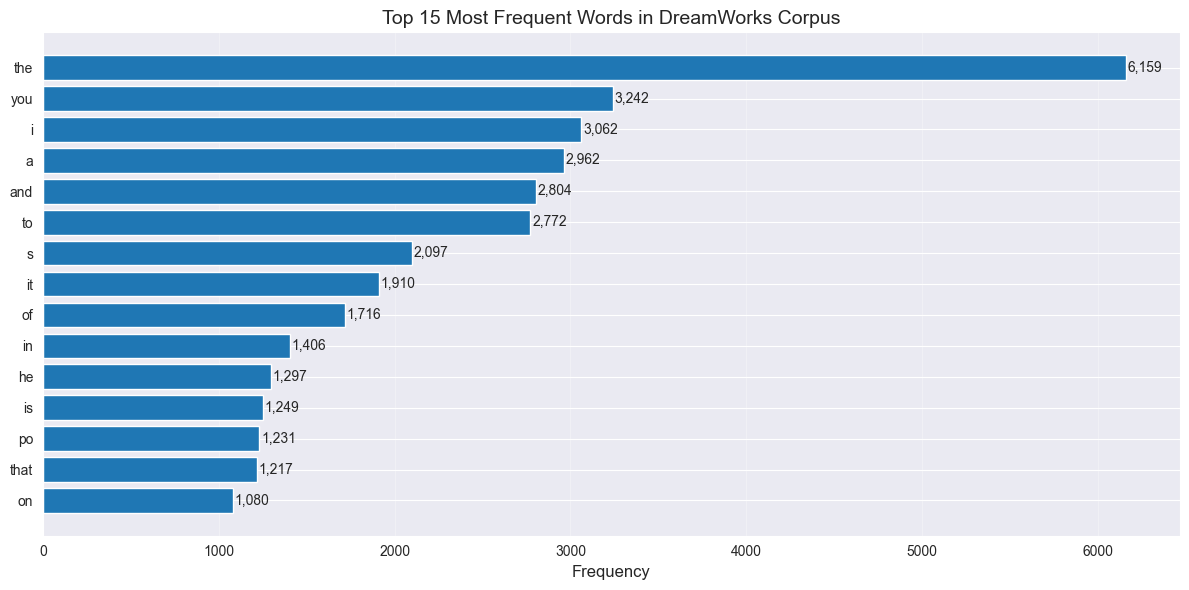

In [104]:
# Create frequency distribution for the entire corpus
all_tokens = movie_corpus.words()
corpus_fd = FreqDist([token.lower() for token in all_tokens if token.isalnum()])

print("TOP 20 MOST FREQUENT WORDS IN CORPUS")
print("=" * 50)
print(f"{'Word':<15} {'Frequency':<12} {'Percentage':<12}")
print("-" * 50)

total_tokens = len([t for t in all_tokens if t.isalnum()])
for word, freq in corpus_fd.most_common(20):
    percentage = (freq / total_tokens) * 100
    print(f"{word:<15} {freq:<12,} {percentage:<12.2f}%")

print("-" * 50)
print(f"Total (alphabetic) tokens analysed: {total_tokens:,}")
print(f"Unique words (types): {corpus_fd.B():,}")

# Visualise top 15 words
top_words = corpus_fd.most_common(15)
words = [w[0] for w in top_words]
freqs = [w[1] for w in top_words]

plt.figure(figsize=(12, 6))
bars = plt.barh(words[::-1], freqs[::-1])  # , color='steelblue'
plt.xlabel('Frequency', fontsize=12)
plt.title('Top 15 Most Frequent Words in DreamWorks Corpus', fontsize=14)
plt.grid(axis='x', alpha=0.3)

# Add frequency labels
for i, (bar, freq) in enumerate(zip(bars, freqs[::-1])):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2,
             f'{freq:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Preprocessing Effects Analysis

PREPROCESSING DEMONSTRATION (First 100 tokens of 'Shrek')

RAW             | Tokens: 100 | Sample: NIGHT - NEAR SHREK ' S HOME Ogre Hunter 1...

LOWERCASE       | Tokens: 100 | Sample: night - near shrek ' s home ogre hunter 1...

NO_PUNCTUATION  | Tokens: 71  | Sample: NIGHT NEAR SHREK S HOME Ogre Hunter 1 Think it...

NO_STOPWORDS    | Tokens: 69  | Sample: NIGHT - NEAR SHREK ' HOME Ogre Hunter 1 :...

COMBINED        | Tokens: 40  | Sample: night near shrek home ogre hunter 1 think ogre hunter...

PREPROCESSING EFFECTS ON ENTIRE CORPUS METRICS

Raw                 
  Tokens:   181,538
  Types:     11,082
  TTR:       0.0610
  Token reduction: 0.0%

Lowercase           
  Tokens:   181,538
  Types:      9,084
  TTR:       0.0500
  Token reduction: 0.0%

No Punctuation      
  Tokens:   136,466
  Types:     10,905
  TTR:       0.0799
  Token reduction: 24.8%

No Stopwords        
  Tokens:   118,136
  Types:     10,743
  TTR:       0.0909
  Token reduction: 34.9%

Combined            

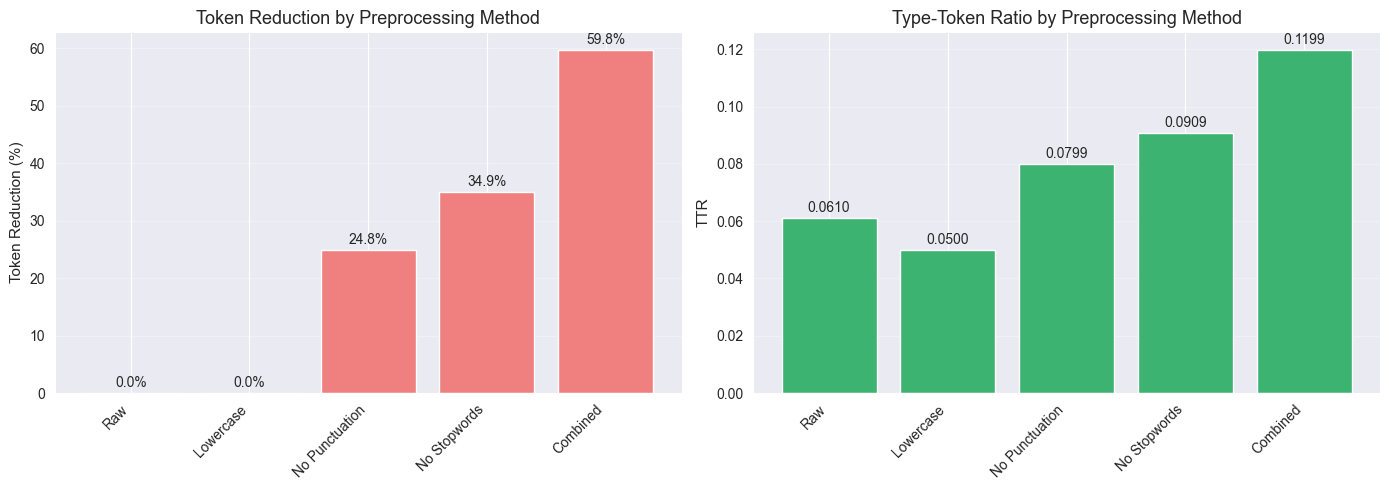

In [105]:
def apply_preprocessing(tokens, method='raw'):
    """
    Apply different preprocessing methods.

    Parameters:
    - tokens: list of tokens
    - method: preprocessing method to apply

    Returns:
    - Processed list of tokens
    """
    if method == 'raw':
        return tokens  # No processing

    processed = []

    if method == 'lowercase':
        # Convert all tokens to lowercase
        return [token.lower() for token in tokens]

    elif method == 'no_punctuation':
        # Remove punctuation tokens
        return [token for token in tokens if token.isalnum()]

    elif method == 'no_stopwords':
        # Remove English stopwords
        sw = set(stopwords.words('english'))
        return [token for token in tokens if token.lower() not in sw]

    elif method == 'combined':
        # Apply all preprocessing steps
        sw = set(stopwords.words('english'))
        return [token.lower() for token in tokens if token.isalnum() and token.lower() not in sw]

    return tokens

# Test preprocessing on a sample from one film
sample_tokens = movie_corpus.words('Shrek (2001).txt')[:100]
print("PREPROCESSING DEMONSTRATION (First 100 tokens of 'Shrek')")
print("=" * 70)

methods = ['raw', 'lowercase', 'no_punctuation', 'no_stopwords', 'combined']
for method in methods:
    processed = apply_preprocessing(sample_tokens, method)
    print(f"\n{method.upper():<15} | Tokens: {len(processed):<3} | Sample: {' '.join(processed[:10])}...")

# Analyse preprocessing effects on the entire corpus
print("\n" + "=" * 70)
print("PREPROCESSING EFFECTS ON ENTIRE CORPUS METRICS")
print("=" * 70)

results = []
all_corpus_tokens = movie_corpus.words()

for method in methods:
    processed_tokens = apply_preprocessing(all_corpus_tokens, method)

    # Calculate metrics
    token_count = len(processed_tokens)
    type_count = len(set(processed_tokens))
    ttr = type_count / token_count if token_count > 0 else 0

    results.append({
        'Method': method.replace('_', ' ').title(),
        'Tokens': token_count,
        'Types': type_count,
        'TTR': ttr,
        'Token Reduction': f"{(1 - token_count/len(all_corpus_tokens)) * 100:.1f}%",
        'TTR Change': f"{(ttr - (len(set(all_corpus_tokens))/len(all_corpus_tokens))) * 100:+.1f}%"
    })

    # Print results
    print(f"\n{method.replace('_', ' ').title():<20}")
    print(f"  Tokens: {token_count:>9,}")
    print(f"  Types:  {type_count:>9,}")
    print(f"  TTR:    {ttr:>9.4f}")
    print(f"  Token reduction: {(1 - token_count/len(all_corpus_tokens)) * 100:.1f}%")

# Create DataFrame for better visualisation
df_results = pd.DataFrame(results)
print("\n" + "=" * 70)
print("SUMMARY TABLE")
print("=" * 70)
print(df_results[['Method', 'Tokens', 'Types', 'TTR']].to_string(index=False))

# Create visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Token Reduction
methods_display = [r['Method'] for r in results]
x_positions = range(len(methods_display))  # Create positions for bars
token_reduction = [(1 - r['Tokens']/results[0]['Tokens'])*100 for r in results]

bars1 = axes[0].bar(x_positions, token_reduction, color='lightcoral')
axes[0].set_title('Token Reduction by Preprocessing Method', fontsize=13)
axes[0].set_ylabel('Token Reduction (%)', fontsize=11)
axes[0].set_xticks(x_positions)  # Set tick positions
axes[0].set_xticklabels(methods_display, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, v) in enumerate(zip(bars1, token_reduction)):
    axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

# 2. TTR Changes
ttr_values = [r['TTR'] for r in results]
bars2 = axes[1].bar(x_positions, ttr_values, color='mediumseagreen')
axes[1].set_title('Type-Token Ratio by Preprocessing Method', fontsize=13)
axes[1].set_ylabel('TTR', fontsize=11)
axes[1].set_xticks(x_positions)  # Set tick positions
axes[1].set_xticklabels(methods_display, rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, v) in enumerate(zip(bars2, ttr_values)):
    axes[1].text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 5. Unique Analysis: Emotion Word Usage Across Films

**Research Question:** How do positive emotion words vary across different DreamWorks films, and do certain films show distinct emotional vocabulary patterns?

This analysis examines the distribution of common positive emotion words to understand emotional tone variation across the corpus.

In [106]:
# Positive emotion words to track
positive_emotions = ['love', 'happy', 'joy', 'fun', 'smile', 'laugh',
                     'good', 'great', 'wonderful', 'beautiful', 'friend',
                     'hope', 'kind', 'nice', 'brave', 'hero', 'win']

print("=" * 70)
print("EMOTION WORD ANALYSIS ACROSS FILMS")
print("=" * 70)

# Store results for each film
emotion_results = []

for fileid in sorted(movie_corpus.fileids()):
    tokens = [token.lower() for token in movie_corpus.words(fileid) if token.isalnum()]
    fd = FreqDist(tokens)

    # Count emotion words
    emotion_counts = {}
    total_emotion_words = 0

    for emotion in positive_emotions:
        count = fd[emotion]
        if count > 0:
            emotion_counts[emotion] = count
            total_emotion_words += count

    # Calculate metrics
    total_tokens = len(tokens)
    emotion_density = (total_emotion_words / total_tokens) * 1000 if total_tokens > 0 else 0

    emotion_results.append({
        'Film': fileid.replace('.txt', '').replace('_', ' ').title(),
        'Total Tokens': total_tokens,
        'Emotion Words': total_emotion_words,
        'Emotion Density': emotion_density,
        'Unique Emotions': len(emotion_counts),
        'Top Emotion': max(emotion_counts.items(), key=lambda x: x[1])[0] if emotion_counts else 'None'
    })

    # Print summary for this film
    print(f"{fileid.replace('.txt', '').replace('_', ' ').title():25}")
    print(f"  Emotion words: {total_emotion_words:>3} (density: {emotion_density:.2f} per 1000 tokens)")
    if emotion_counts:
        top_three = sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True)[:3]
        print(f"  Most frequent: {', '.join([f'{word}({count})' for word, count in top_three])}")
    print()

EMOTION WORD ANALYSIS ACROSS FILMS
Bee Movie (2007)         
  Emotion words:  66 (density: 3.98 per 1000 tokens)
  Most frequent: good(18), great(10), kind(7)

How To Train Your Dragon (2010)
  Emotion words:  48 (density: 4.34 per 1000 tokens)
  Most frequent: good(14), great(8), love(4)

Kung Fu Panda (2008)     
  Emotion words:  48 (density: 2.60 per 1000 tokens)
  Most frequent: good(17), smile(7), friend(6)

Kung Fu Panda 2 (2011)   
  Emotion words:  33 (density: 1.77 per 1000 tokens)
  Most frequent: good(5), love(4), happy(3)

Madagascar (2005)        
  Emotion words: 115 (density: 8.14 per 1000 tokens)
  Most frequent: good(27), great(20), love(14)

Madagascar 2 (2008)      
  Emotion words: 120 (density: 9.25 per 1000 tokens)
  Most frequent: good(28), love(25), friend(12)

Megamind (2010)          
  Emotion words: 129 (density: 8.12 per 1000 tokens)
  Most frequent: good(43), hero(27), love(10)

Monsters Vs Aliens (2009)
  Emotion words:  45 (density: 5.14 per 1000 token

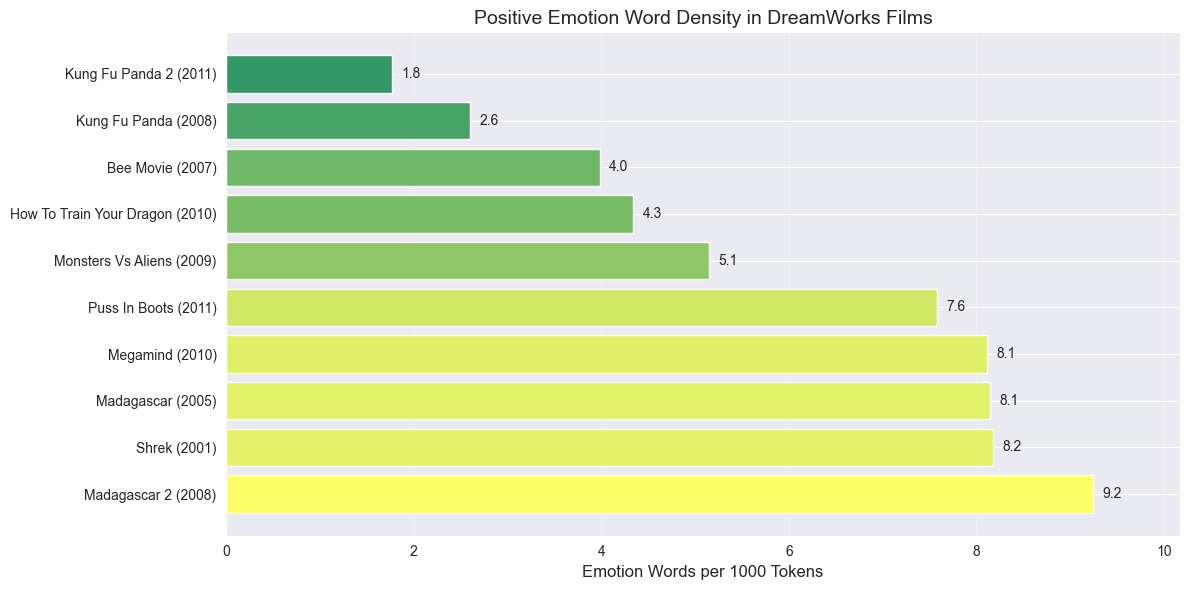

In [107]:
# Create visualisation
df_emotion = pd.DataFrame(emotion_results)
df_sorted = df_emotion.sort_values('Emotion Density', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.barh(df_sorted['Film'], df_sorted['Emotion Density'],
                color=plt.cm.summer(df_sorted['Emotion Density']/df_sorted['Emotion Density'].max()))

plt.title('Positive Emotion Word Density in DreamWorks Films', fontsize=14)
plt.xlabel('Emotion Words per 1000 Tokens', fontsize=12)
plt.xlim(0, max(df_sorted['Emotion Density']) * 1.1)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for bar, density in zip(bars, df_sorted['Emotion Density']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{density:.1f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 6. Critical Reflection

This analysis of ten DreamWorks film transcripts has provided clear insights into word distribution patterns and how preprocessing decisions affect our measurements. Below we consider the methodological choices, key findings, and what they mean for corpus linguistics.

The DreamWorks corpus, while thematically consistent, has some limitations worth noting. Fan-created transcriptions, though readily available, show inconsistencies in formatting, speaker labelling, and occasional errors. These variations likely impact frequency counts, especially for character names and descriptive text. We chose to include complete transcripts with both dialogue and scene directions, which was a deliberate trade-off. This provides fuller context but adds noise from non-dialogue elements. Future work would benefit from more systematic cleaning or focusing solely on spoken dialogue.

The preprocessing analysis demonstrates how methodological choices transform corpus metrics. The removal of stopwords made a 34.9% reduction in token count while elevating the Type-Token Ratio from 0.061 to 0.090. This substantial alteration shows the predominance of functional words within animated film dialogue. The full preprocessing approach (encompassing lowercasing, punctuation elimination, and stopword removal) proved particularly transformative, reducing the corpus to 59.8% of its original volume while boosting lexical diversity measurements. These outcomes emphasise that TTR values possess limited meaning without explicit documentation of preprocessing methodologies, which is a crucial consideration for analytical transparency and replicability in corpus linguistics.

The investigation of positive emotion vocabulary revealed variations across the film texts. *Madagascar: Escape 2 Africa (2008)* demonstrated the highest emotion word density (9.2 per 1000 tokens), corresponding with its narrative emphasis on familial reconciliation, friendship dynamics, and communal belonging. Conversely, *Kung Fu Panda 2 (2011)* exhibited the lowest emotion word density, reflecting its action-oriented narrative focus and themes of personal destiny and internal conflict. This difference suggests that emotional vocabulary correlates more strongly with narrative emphasis than with chronological release patterns. The stable TTR range across preprocessing conditions (0.061-0.090) indicates consistent vocabulary patterns despite different processing methods, which may suggest lexical constraints within the genre.

These findings show that animated film collections have distinct language profiles shaped by genre conventions, target audiences, and narrative approaches. The research contributes to understanding how lexical distributions reflect storytelling choices within commercial animation. Future studies could compare different animation studios, track language changes over time, or examine character-specific speech patterns using more advanced techniques.

In conclusion, this analysis demonstrates how basic corpus methods can reveal meaningful patterns in popular media. The work emphasises the importance of clear methodology while providing a practical framework for similar studies. The findings advance our understanding of word use in animated stories and show how language choices connect with narrative purpose in contemporary animation.

This work is publicly accessible via GitHub: https://github.com/jescsk/LSCI220/tree/main/A1